In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error

In [2]:
#load the data
data = pd.read_csv('powerball.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577 entries, 0 to 576
Data columns (total 43 columns):
Draw No                    577 non-null int64
Draw Date                  577 non-null object
Ball 1                     577 non-null int64
Ball 2                     577 non-null int64
Ball 3                     577 non-null int64
Ball 4                     577 non-null int64
Ball 5                     577 non-null int64
Powerball                  577 non-null int64
Div1                       577 non-null int64
Div2                       577 non-null int64
Div3                       577 non-null int64
Div4                       577 non-null int64
Div5                       577 non-null int64
Div6                       577 non-null int64
Div7                       577 non-null int64
Div8                       577 non-null int64
Div1 No Win                577 non-null int64
Div2 No Win                577 non-null int64
Div3 No Win                577 non-null int64
Div4 No Win         

In [4]:
print (data.head(5)) 

   Draw No   Draw Date  Ball 1  Ball 2  Ball 3  Ball 4  Ball 5  Powerball  \
0      577  29/05/2015       4      12      17      25      29          5   
1      576  26/05/2015      12      13      20      31      36         19   
2      575  22/05/2015       9      31      32      40      41         10   
3      574  19/05/2015       3      21      25      26      36          1   
4      573  15/05/2015       8      26      40      44      45          7   

   Div1    Div2         ...          Powerbal Ball Set  Gauteng Winners  \
0     0  138020         ...                        PB5                0   
1     0  203470         ...                        PB4                0   
2     0  397954         ...                        PB2                0   
3     0  236728         ...                        PB5                0   
4     0  273026         ...                        PB4                0   

   Western Cape Winners  Northern Cape Winners  Eastern Cape Winners  \
0             

In [5]:
data.describe()

,Draw No,Ball 1,Ball 2,Ball 3,Ball 4,Ball 5,Powerball,Div1,Div2,Div3,...,Total Sales,Gauteng Winners,Western Cape Winners,Northern Cape Winners,Eastern Cape Winners,Mpumalanga Winners,Limpopo Winners,Freestate Winners,KZN Winners,North West Winners
count,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,5.770000e+02,5.770000e+02,577.000000,...,5.770000e+02,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000
mean,289.000000,7.828423,15.448873,22.785095,30.882149,38.173310,10.637782,2.875913e+06,3.465407e+05,20861.507799,...,1.572875e+07,0.065858,0.025997,0.001733,0.010399,0.006932,0.012132,0.006932,0.024263,0.008666
std,166.709828,6.155679,7.510495,8.207313,7.795786,6.135149,5.788413,1.029682e+07,2.402304e+05,9135.985327,...,5.274231e+06,0.261862,0.169814,0.041631,0.131350,0.083044,0.109569,0.083044,0.175101,0.092765
min,1.000000,1.000000,2.000000,4.000000,5.000000,13.000000,1.000000,0.000000e+00,0.000000e+00,6310.000000,...,7.404194e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,145.000000,3.000000,9.000000,17.000000,26.000000,35.000000,6.000000,0.000000e+00,1.818430e+05,15761.000000,...,1.295400e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,289.000000,7.000000,15.000000,23.000000,32.000000,40.000000,11.000000,0.000000e+00,2.680130e+05,19351.000000,...,1.431372e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,433.000000,12.000000,20.000000,28.000000,37.000000,43.000000,16.000000,0.000000e+00,4.375070e+05,23369.000000,...,1.653288e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,577.000000,33.000000,39.000000,43.000000,44.000000,45.000000,20.000000,1.020166e+08,1.121916e+06,97278.000000,...,6.034506e+07,2.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000


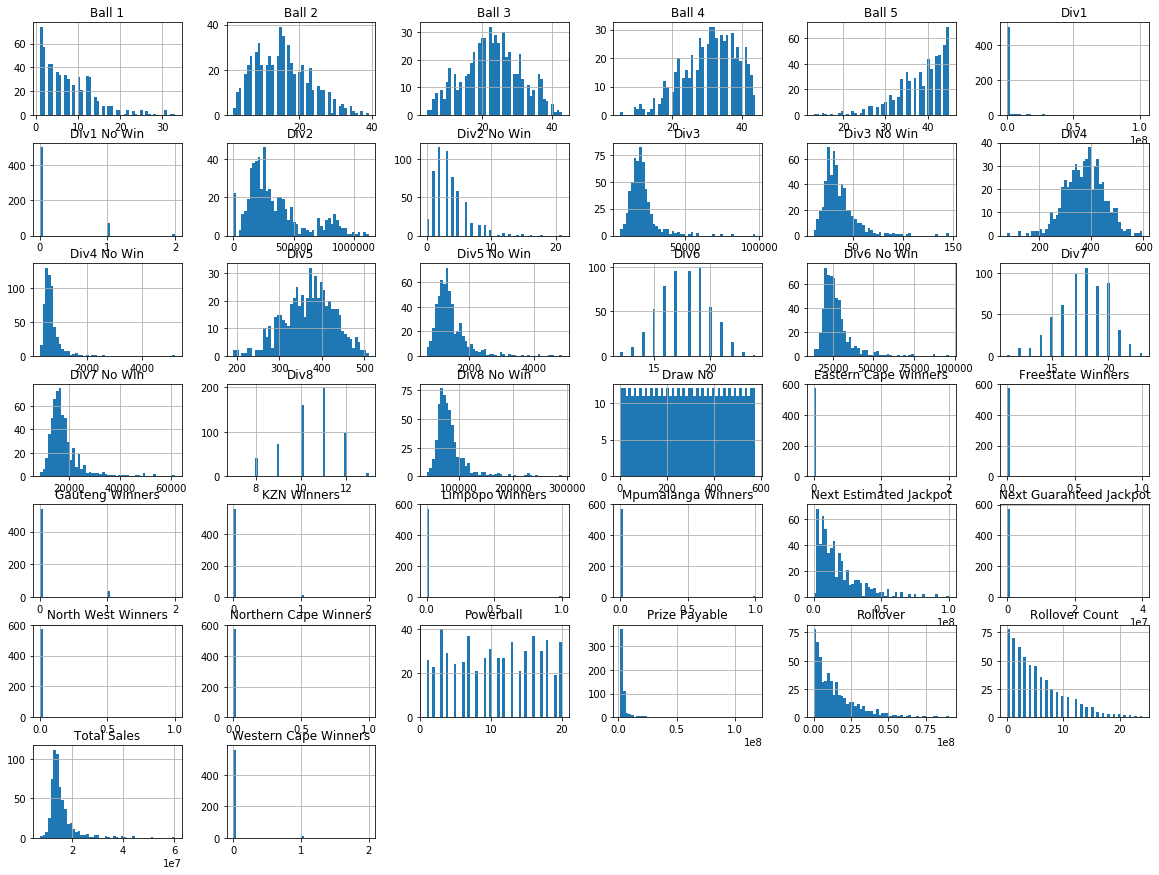

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

data.hist(bins=50, figsize=(20,15))
plt.show()

In [7]:
#Getting columns of prize payable, rollover, rollover count, next estimtor
X = data.iloc[:, 24:28].values
#get division 1 winner
y = data.iloc[:, 16:17].values

#make winner is one, not is zero
y = np.where(y>=1, 1, 0)

print("Feautres:\n",X[:5])
print("Winners columns:\n", y[:5])

Feautres:
 [[ 3529524 12520572        5        0]
 [ 3496692  9906982        4 11000000]
 [ 3438604  7338342        3  9000000]
 [ 3044631  4826424        2  7000000]
 [ 3532792  2585051        1  5000000]]
Winners columns:
 [[0]
 [0]
 [0]
 [0]
 [0]]


In [8]:
#seperate data to train part and test part
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [9]:
#scaling the data
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

D:\Masters\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [10]:
#here we can use SVM
C=1.0

clf = SVC(kernel='linear', C=C)
#the default way
#clf = SVC()
#train model
clf.fit(X_train,y_train)

D:\Masters\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [11]:
#predict the values of x given test set
y_pred=clf.predict(X_test)
#print the mean squared error for y_pred, y_test
print("msq: ",mean_squared_error(y_test, y_pred))

#print part of results
y_test=pd.DataFrame(y_test)
y_pred=pd.DataFrame(y_pred)

res = pd.concat([y_test, y_pred], axis = 1)
print(res)

msq:  0.0
     0  0
0    0  0
1    0  0
2    1  1
3    0  0
4    0  0
5    0  0
6    0  0
7    0  0
8    0  0
9    0  0
10   0  0
11   0  0
12   0  0
13   0  0
14   0  0
15   0  0
16   0  0
17   0  0
18   0  0
19   1  1
20   1  1
21   0  0
22   0  0
23   0  0
24   0  0
25   0  0
26   0  0
27   0  0
28   0  0
29   0  0
..  .. ..
115  0  0
116  0  0
117  0  0
118  0  0
119  0  0
120  0  0
121  0  0
122  0  0
123  0  0
124  0  0
125  0  0
126  0  0
127  0  0
128  0  0
129  0  0
130  0  0
131  0  0
132  0  0
133  0  0
134  0  0
135  0  0
136  0  0
137  0  0
138  0  0
139  0  0
140  0  0
141  0  0
142  0  0
143  0  0
144  0  0

[145 rows x 2 columns]


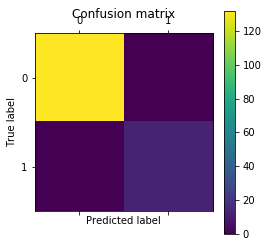

In [12]:
#confusion matrix, shows how model fit with data
cm = confusion_matrix(y_test, y_pred)
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()